In [1]:
import warnings
warnings.filterwarnings("ignore")
import tensorflow
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten
from sklearn.metrics import accuracy_score 

In [2]:
(X_train,y_train),(X_test,y_test) = keras.datasets.mnist.load_data()

In [3]:
X_test.shape 

(10000, 28, 28)

In [4]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

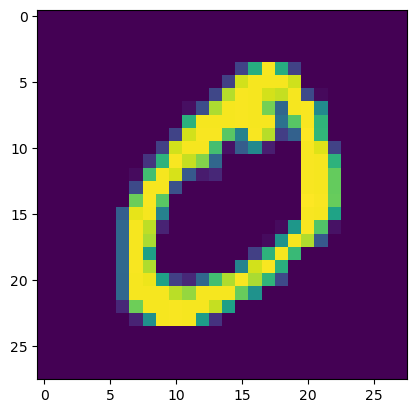

In [5]:
plt.imshow(X_train[1])

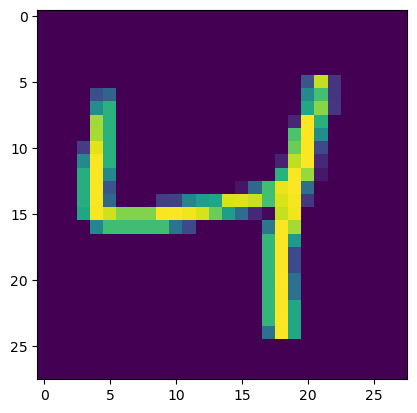

In [6]:
plt.imshow(X_train[2])

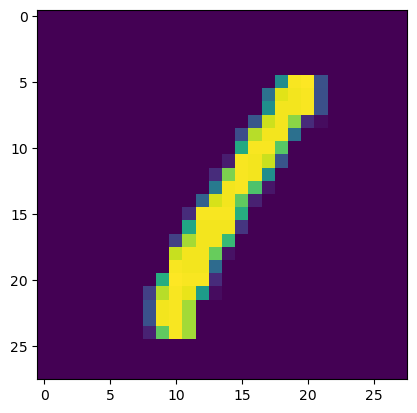

In [7]:
plt.imshow(X_train[3])

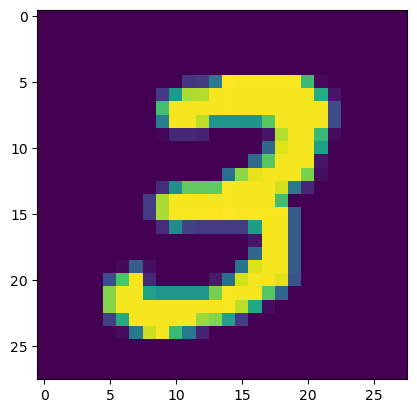

In [8]:
plt.imshow(X_train[7])

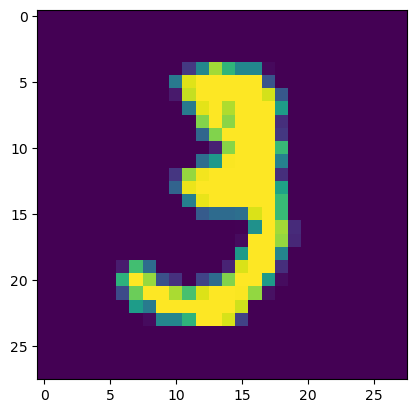

In [9]:
plt.imshow(X_train[10])

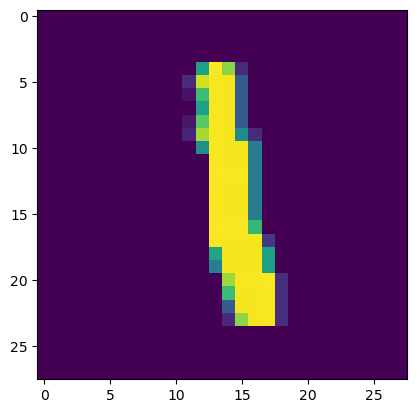

In [10]:
plt.imshow(X_train[6])

In [11]:
X_train = X_train/255
X_test = X_test/255

In [12]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [13]:
model = Sequential()

model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 32)                4128      
                                                                 
 dense_2 (Dense)             (None, 10)                330       
                                                                 
Total params: 104938 (409.91 KB)
Trainable params: 104938 (409.91 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [15]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])
history = model.fit(X_train,y_train,epochs=25,validation_split=0.2)


Epoch 1/25
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2760 - accuracy: 0.9211 - val_loss: 0.1619 - val_accuracy: 0.9537
Epoch 2/25
1500/1500 [==============================] - 3s 2ms/step - loss: 0.1162 - accuracy: 0.9651 - val_loss: 0.1132 - val_accuracy: 0.9645
Epoch 3/25
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0820 - accuracy: 0.9751 - val_loss: 0.0998 - val_accuracy: 0.9692
Epoch 4/25
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0614 - accuracy: 0.9801 - val_loss: 0.1208 - val_accuracy: 0.9626
Epoch 5/25
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0481 - accuracy: 0.9846 - val_loss: 0.0917 - val_accuracy: 0.9727
Epoch 6/25
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0383 - accuracy: 0.9874 - val_loss: 0.0949 - val_accuracy: 0.9739
Epoch 7/25
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0311 - accuracy: 0.9899 - val_loss: 0.0998 - val_accuracy:

In [16]:
y_prob = model.predict(X_test)

313/313 [==============================] - 0s 1ms/step


In [17]:
y_pred = y_prob.argmax(axis=1)

In [18]:
accuracy_score(y_test,y_pred)

0.977

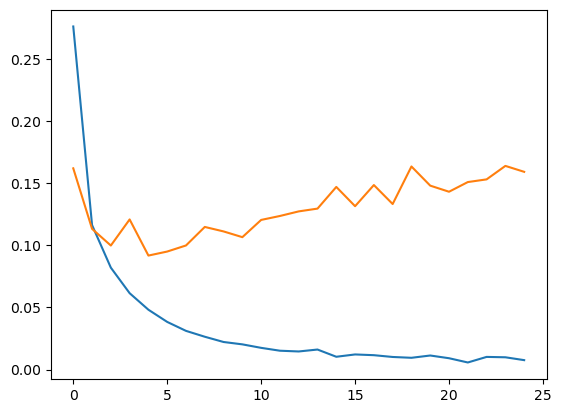

In [19]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

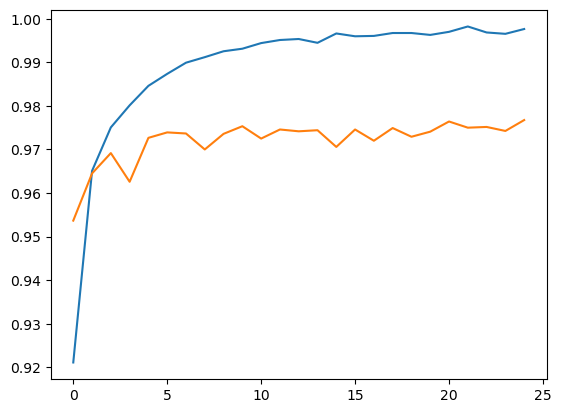

In [20]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

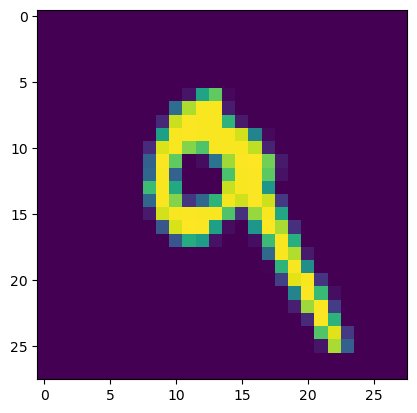

In [21]:
plt.imshow(X_test[7])

In [22]:
model.predict(X_test[4].reshape(1,28,28)).argmax(axis=1)

1/1 [==============================] - 0s 20ms/step


array([4], dtype=int64)